In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.regularizers import l2


In [2]:
data_dir=pathlib.Path("C:\\Users\\viral\\OneDrive\\Desktop\\Master Python\\DL Project\\Wonders of the World\\Wonders of World\\Wonders of World\\")

In [3]:
img_count=len(list(data_dir.glob('*/*')))
img_count

3846

In [4]:
batch_size=32
img_height=180
img_width=180

In [5]:
train_ds=keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size

)

Found 3846 files belonging to 12 classes.
Using 3077 files for training.


In [6]:
val_ds=keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size

)

Found 3846 files belonging to 12 classes.
Using 769 files for validation.


In [7]:
class_name=train_ds.class_names

In [8]:
class_name

['burj_khalifa',
 'chichen_itza',
 'christ_the_reedemer',
 'eiffel_tower',
 'great_wall_of_china',
 'machu_pichu',
 'pyramids_of_giza',
 'roman_colosseum',
 'statue_of_liberty',
 'stonehenge',
 'taj_mahal',
 'venezuela_angel_falls']

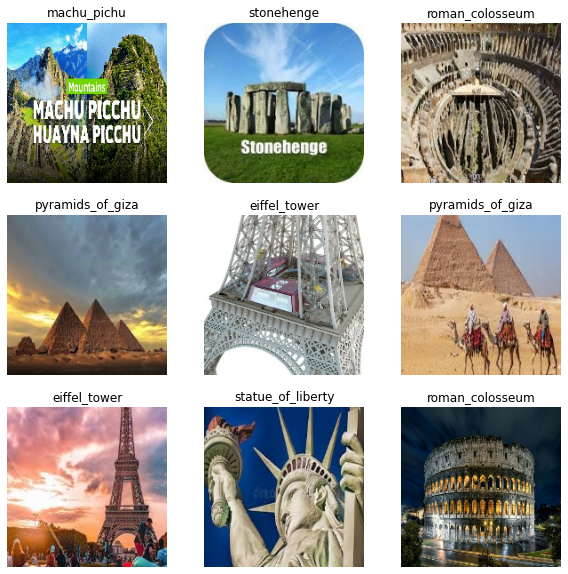

In [9]:
plt.figure(figsize=(10,10))
for image,label in train_ds.take(1):
    for i  in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_name[label[i]])
        plt.axis('off')

In [10]:
model=Sequential([
    layers.Rescaling(1/255,input_shape=(img_height,img_width,3)),
    layers.RandomFlip('horizontal',input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(len(class_name))
    ])

In [11]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:
epochs=20
history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
97/97 [==============================] - 180s 2s/step - loss: 0.3884 - accuracy: 0.8729 - val_loss: 0.7070 - val_accuracy: 0.8101
Epoch 2/20
97/97 [==============================] - 142s 1s/step - loss: 0.3342 - accuracy: 0.8846 - val_loss: 0.6860 - val_accuracy: 0.7984
Epoch 3/20
97/97 [==============================] - 170s 2s/step - loss: 0.3585 - accuracy: 0.8811 - val_loss: 0.6734 - val_accuracy: 0.8257
Epoch 4/20
97/97 [==============================] - 155s 2s/step - loss: 0.3235 - accuracy: 0.8876 - val_loss: 0.6267 - val_accuracy: 0.8296
Epoch 5/20
97/97 [==============================] - 162s 2s/step - loss: 0.2943 - accuracy: 0.9038 - val_loss: 0.6921 - val_accuracy: 0.8153
Epoch 6/20
97/97 [==============================] - 156s 2s/step - loss: 0.3033 - accuracy: 0.9009 - val_loss: 0.7131 - val_accuracy: 0.8114
Epoch 7/20
97/97 [==============================] - 195s 2s/step - loss: 0.2898 - accuracy: 0.8954 - val_loss: 0.7120 - val_accuracy: 0.8101
Epoch 8/20
97

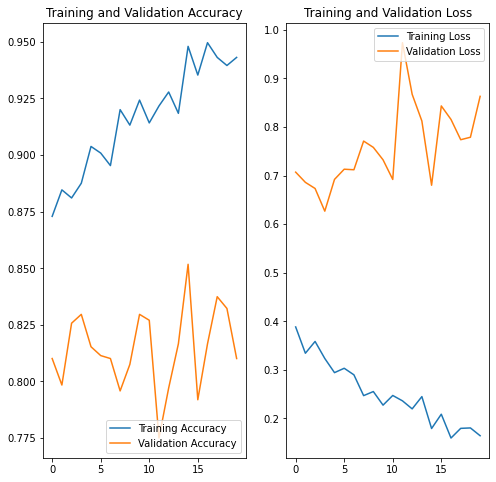

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
d
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
y='C:/Users/viral/OneDrive/Desktop/qwe.jpg'

In [52]:
img = tf.keras.utils.load_img(
    y, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

In [53]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to burj_khalifa with a 80.42 percent confidence.


In [54]:
class_name

['burj_khalifa',
 'chichen_itza',
 'christ_the_reedemer',
 'eiffel_tower',
 'great_wall_of_china',
 'machu_pichu',
 'pyramids_of_giza',
 'roman_colosseum',
 'statue_of_liberty',
 'stonehenge',
 'taj_mahal',
 'venezuela_angel_falls']